In [6]:
# Import the library to mount Google Drive
from google.colab import drive

In [7]:
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#**1. Dataset**
**Load and Preprocess Data**

In [35]:
from sklearn.preprocessing import StandardScaler

# Load the dataset
test_file_path = '/content/drive/My Drive/Customer Data/Copy of fraudTrain.csv'
data = pd.read_csv(test_file_path, nrows=10000)

# Display the first few rows
print(data.head())

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Normalize features if necessary
scaler = StandardScaler()
data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.fit_transform(data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

<ipython-input-35-9ec40865fc49>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


#**2. Model**
**Model Selection, Training, and Evaluation**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.fit_transform(data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=['merchant', 'category', 'gender'], drop_first=True)

# Select features and target
X = data.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time', 'is_fraud'])
y = data['is_fraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9966666666666667
[[2989    3]
 [   7    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2992
           1       0.25      0.12      0.17         8

    accuracy                           1.00      3000
   macro avg       0.62      0.56      0.58      3000
weighted avg       1.00      1.00      1.00      3000



#**3. Prediction**
**Make Predictions on New Data**

In [12]:
# Example new data
new_data = pd.DataFrame({
    'merchant': ['merchant_1'],
    'category': ['category_1'],
    'amt': [100],
    'gender': ['M'],
    'lat': [40.7128],
    'long': [-74.0060],
    'city_pop': [8000000],
    'merch_lat': [40.7128],
    'merch_long': [-74.0060]
})

# Normalize new data
new_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.transform(new_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])

# One-hot encode the new data using the same columns as the training data
new_data = pd.get_dummies(new_data, columns=['merchant', 'category', 'gender'], drop_first=True)

# Ensure the new data has the same columns as the training data
missing_cols = set(X_train.columns) - set(new_data.columns)
for c in missing_cols:
    new_data[c] = 0
new_data = new_data[X_train.columns]

# Make prediction
prediction = model.predict(new_data)
print(f'Prediction: {prediction}')

<ipython-input-12-cd61356a8b83>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[c] = 0
<ipython-input-12-cd61356a8b83>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[c] = 0
<ipython-input-12-cd61356a8b83>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[c] = 0
<ipytho

Prediction: [1]


#**Optional Features**

##**Visualization**

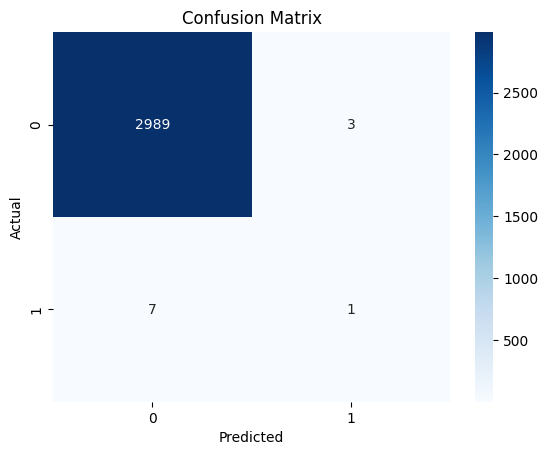

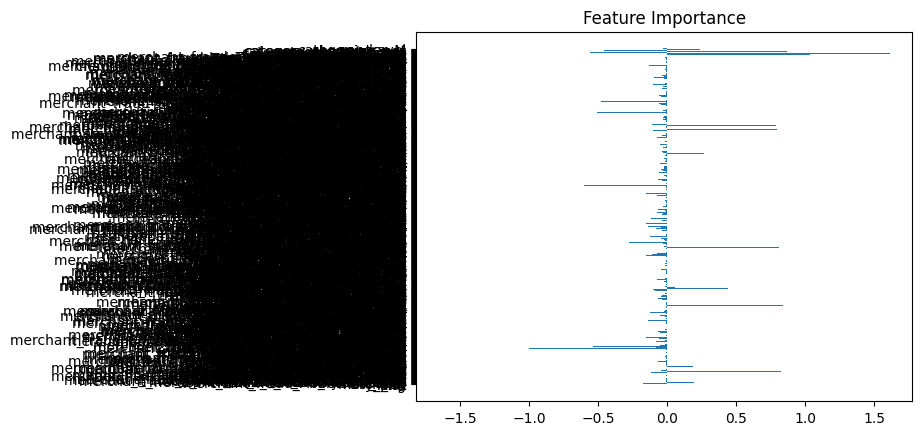

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importance = model.coef_[0]
features = X.columns
plt.barh(features, importance)
plt.title('Feature Importance')
plt.show()

##**Experiment with Different Models**

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}')

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}')

Decision Tree Accuracy: 0.9963333333333333
Random Forest Accuracy: 0.9983333333333333


In [37]:
# Save the model and scaler
joblib.dump(rf_model, '/content/drive/My Drive/model.joblib')
joblib.dump(scaler, '/content/drive/My Drive/scaler.joblib')

['/content/drive/My Drive/scaler.joblib']

##**Deployment (Using gradio)**

In [38]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

# Load the trained model and scaler
model = joblib.load('/content/drive/My Drive/model.joblib')
scaler = joblib.load('/content/drive/My Drive/scaler.joblib')

def predict_fraud(merchant, category, amt, gender, lat, long, city_pop, merch_lat, merch_long):
    try:
        new_data = pd.DataFrame({
            'merchant': [merchant],
            'category': [category],
            'amt': [amt],
            'gender': [gender],
            'lat': [lat],
            'long': [long],
            'city_pop': [city_pop],
            'merch_lat': [merch_lat],
            'merch_long': [merch_long]
        })

        # One-Hot Encoding for categorical variables
        new_data = pd.get_dummies(new_data, columns=['merchant', 'category', 'gender'], drop_first=True)

        # Ensure the new data has the same columns as the training data
        for col in model.feature_names_in_:
            if col not in new_data.columns:
                new_data[col] = 0

        # Normalize new data
        new_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.transform(new_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])

        # Make prediction
        prediction = model.predict(new_data)
        return f'Prediction: {prediction[0]}'

    except Exception as e:
        return f"An error occurred: {e}"

# Define the Gradio interface
# Access components using gr.components
inputs = [
    gr.components.Textbox(label="Merchant"),
    gr.components.Textbox(label="Category"),
    gr.components.Number(label="Amount"),
    gr.components.Radio(choices=["M", "F"], label="Gender"),
    gr.components.Number(label="Latitude"),
    gr.components.Number(label="Longitude"),
    gr.components.Number(label="City Population"),
    gr.components.Number(label="Merchant Latitude"),
    gr.components.Number(label="Merchant Longitude")
]

# Changed from gr.outputs.Textbox to gr.Textbox
outputs = gr.Textbox(label="Prediction")

gr.Interface(fn=predict_fraud, inputs=inputs, outputs=outputs, title="Fraud Detection Model").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://157627a5a85d30001c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
